В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [4]:
path = 'data/yulu_rental.csv'
yulu_rental_df = pd.read_csv(path)

2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [7]:
display(yulu_rental_df.head(3),
       yulu_rental_df.info(),
       yulu_rental_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


None

(10886, 12)

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [9]:
yulu_rental_df['datetime'] = pd.to_datetime(yulu_rental_df.datetime)

3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

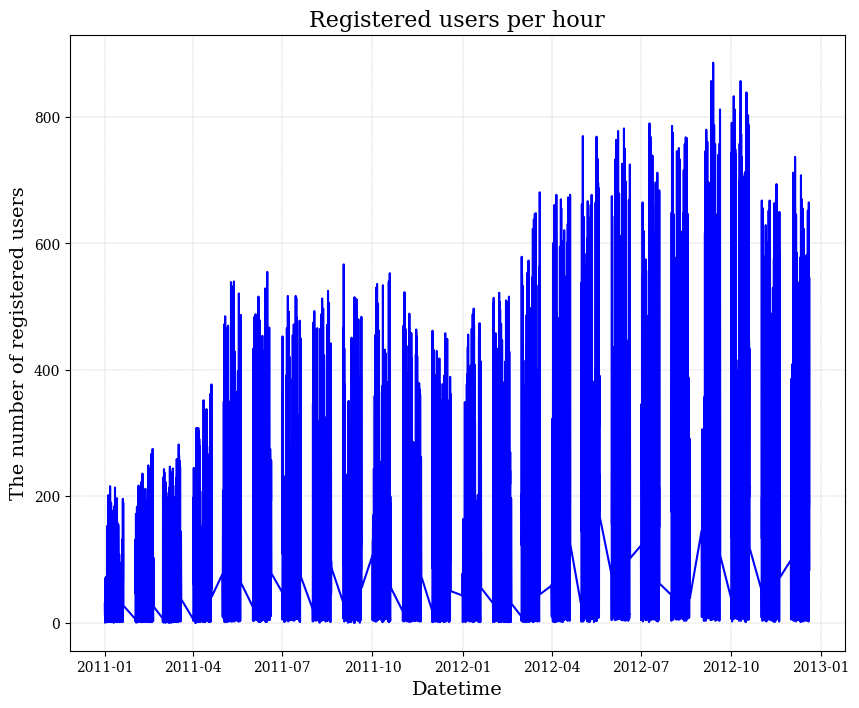

In [24]:
plt.figure(figsize=(10,8))
plt.plot(yulu_rental_df['datetime'], 
         yulu_rental_df['registered'], 
         linestyle='-', 
         color='blue')
plt.grid(True, 
           linestyle='--', 
           linewidth=0.3)
plt.title('Registered users per hour', fontsize=16)
plt.xlabel('Datetime', fontsize=14)
plt.ylabel('The number of registered users', fontsize=14)
plt.show();

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [26]:
yulu_rental_df['date'] = yulu_rental_df.datetime.dt.date

In [51]:
df_registered_by_date = yulu_rental_df.groupby('date', as_index=False)['registered'].sum()
df_registered_by_date.head()

,date,registered
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

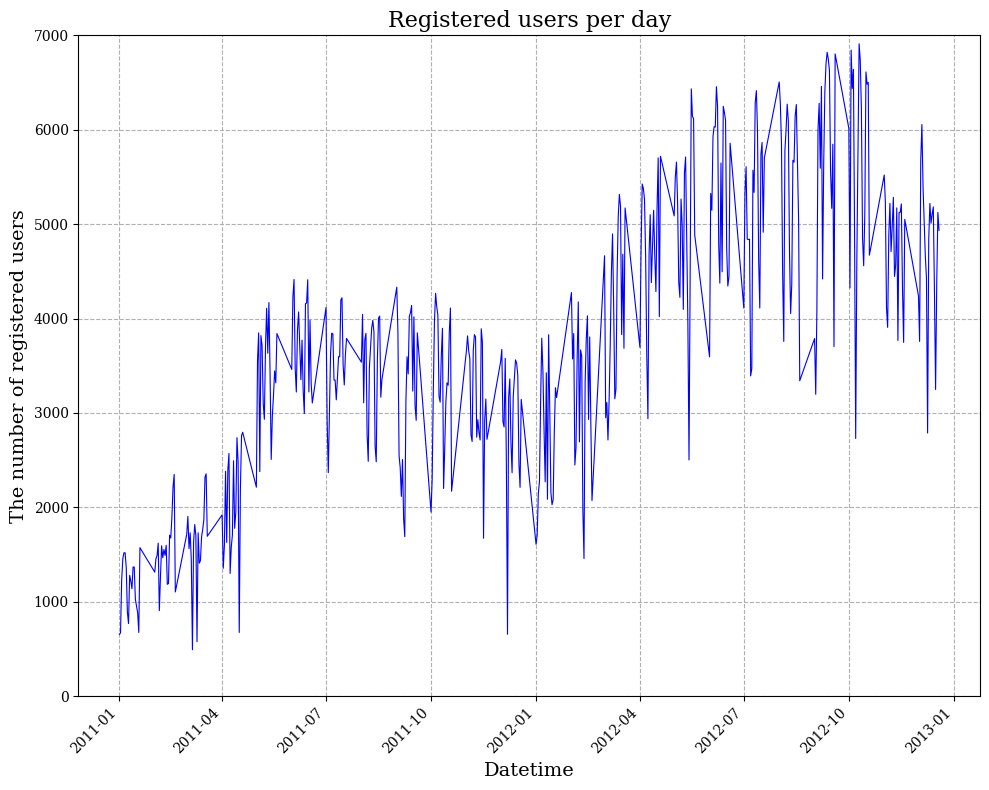

In [49]:
plt.figure(figsize=(10,8))
plt.plot(df_registered_by_date['date'], 
         df_registered_by_date['registered'], 
         linestyle='-',
         linewidth=0.8,
         color='blue')
plt.grid(True, 
           linestyle='--', 
           linewidth=0.8)
plt.title('Registered users per day', fontsize=16)
plt.xlabel('Datetime', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('The number of registered users', fontsize=14)
plt.tight_layout()
plt.ylim(0, 7000)
plt.show();

<h1 style='font-family: Garamond;'>Часовий графік: Кількість зареєстрованих користувачів на день</h1> <hr></hr> <p style='font-family: Garamond; font-size: 18px;'> 

<strong>1. Основні спостереження:</strong> 
- **Горизонтальна вісь (X):** Часовий проміжок від початку 2011 року до кінця 2012 року.<br>
- **Вертикальна вісь (Y):** Кількість зареєстрованих користувачів за день (від 0 до 7000).<br>
- Графік демонструє **тренд, що зростає** , з великими коливаннями кількості користувачів у різні періоди часу.<br> <br>

<strong>2. Тренди та патерни:</strong>

- Початковий період (січень 2011 – липень 2011): Спостерігається поступове зростання з періодичними стрибками і падіннями.<br>
- Середина 2011 – початок 2012: Стабільний рівень коливань у межах 3000–4000 користувачів.<br>
- Період після квітня 2012 року: Значний і чіткий тренд зростання кількості користувачів із досягненням піків понад 6000 користувачів.<br>
- Після вересня 2012 року спостерігаються різкі стрибки і падіння, які можуть бути пов'язані зі сезонністю чи іншими факторами.<br> <br>

<strong>3. Аномалії та коливання:</strong>

Помітні раптові падіння до близьких до нуля значень, що свідчить про можливі проблеми у реєстраційних системах чи наявність аномальних днів.<br>
Піки реєстрацій часто виникають після періодів зниження, що може вказувати на короткострокові кампанії чи інші зовнішні впливи.<br> <br>
<strong>4. Математичний аналіз:</strong>

Тренд можна описати функцією з додатним нахилом у загальному вигляді:
<pre style='font-family: Courier New; font-size: 16px;'> f(t) = k * t + b + noise </pre>
де:

<code>k</code> — коефіцієнт зростання кількості користувачів;<br>
<code>b</code> — початковий рівень;<br>
<code>noise</code> — випадкові коливання навколо тренду.<br>

<strong>5. Висновок:</strong><br>
Графік демонструє зростаючий тренд у кількості зареєстрованих користувачів на день з чіткими коливаннями та аномаліями. Раптові падіння можуть потребувати додаткового аналізу для виявлення їх причин. Відзначаються періоди інтенсивного зростання у другій половині 2012 року, що може вказувати на успішні кампанії чи стратегічні зміни. Крім того, сезонний попит також відіграє ключову роль за оренди та використання наземного транспорту, особливо за умови, що за зимового сезону необхідно сконцентрувати витрати бізнесу щодо інвестуваня в оснащення електровелосипедів зимовою резиною та модернізацію відповідних деталей, що є більш стійкими та витривалими до певних параметрів погоди.

</p>

6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

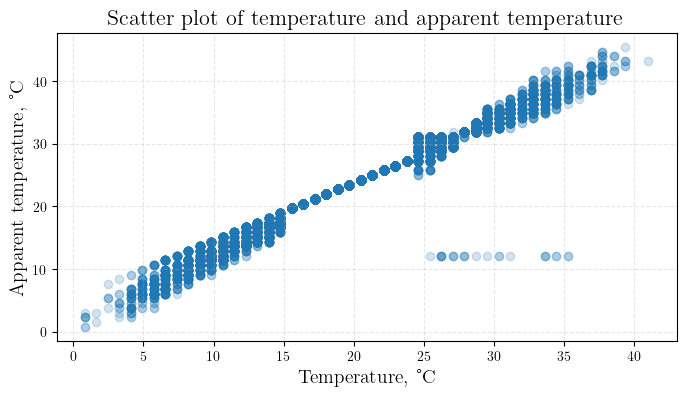

In [64]:
col_x = 'temp'
col_y = 'atemp'

plt.figure(figsize=(8,4))
plt.scatter(yulu_rental_df[col_x], yulu_rental_df[col_y], alpha=0.2)
plt.xlabel('Temperature, °C', fontsize=14)
plt.ylabel('Apparent temperature, °C', fontsize=14)
plt.grid(True, 
           linestyle='--', 
           linewidth=0.8,
           alpha=0.3)
plt.title('Scatter plot of temperature and apparent temperature', fontsize=16)
plt.show();

<h1 style='font-family: Garamond;'>Діаграма розсіювання параметрів (features) <code>temperature</code> та <code>apparent temperature</code></h1>
<hr></hr>

<p style='font-family: Garamond; font-size: 18px;'>
Графік демонструє взаємозалежність між фактичною температурою (<code>temperature</code>) та сприйманою температурою (<code>apparent temperature</code>), побудовану у вигляді діаграми розсіювання.<br><br>

<strong>1. Основні спостереження:</strong><br>
- Залежність між змінними має лінійний характер у більшості діапазонів, що свідчить про сильну <em>позитивну кореляцію</em> між <code>temperature</code> та <code>apparent temperature</code>.<br>
- При значеннях <code>temperature</code> від 0 до 25°C спостерігається <strong>лінійне зростання</strong> <code>apparent temperature</code>.<br>
- У діапазоні 25-35°C відбувається плато, де <code>apparent temperature</code> залишається практично незмінною, що може вказувати на <em>насичення</em> системи вимірювання або моделі.<br><br>

<strong>2. Кореляційний аналіз:</strong><br>
- Кореляція між параметрами є <em>сильною і позитивною</em> (приблизно <code>r ≈ 0.9</code>).<br>
- У діапазоні плато (25-35°C) кореляція послаблюється, оскільки <code>apparent temperature</code> стабілізується.<br><br>

<strong>3. Аномалії:</strong><br>
- **Горизонтальна ділянка** у діапазоні <code>temperature</code> від 25 до 35°C є помітною аномалією. Незважаючи на зростання фактичної температури, значення <code>apparent temperature</code> залишається сталим. Це може вказувати на:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;• Особливості моделі розрахунку температури, що обмежують значення на певному рівні.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;• Людське сприйняття, яке досягає "насичення" при високих температурах.<br>
- **Розкидані точки** на низьких значеннях температури (0-5°C) вказують на можливий випадковий шум у даних або інші чинники, що впливають на сприйняття температури.<br><br>

<strong>4. Математична модель:</strong><br>
Функція залежності може бути апроксимована як <em>кусочно-лінійна функція</em>:
<pre style='font-family: Courier New; font-size: 16px;'>
f(x) = { kx + b,     для x ≤ 25,
         C,          для x > 25 }
</pre>
де:<br>
- <code>k</code> — коефіцієнт нахилу;<br>
- <code>b</code> — зсув;<br>
- <code>C</code> — постійне значення на плато.<br><br>

<strong>5. Висновок:</strong><br>
Діаграма розсіювання свідчить про сильний лінійний зв'язок між фактичною температурою та сприйманою температурою для значень нижче 25°C. При значеннях вище 25°C спостерігається стабільність, що вказує на нелінійну поведінку у високих температурних діапазонах. Аномалії у вигляді плато та розкиданих значень на низьких температурах потребують додаткового аналізу для визначення їхньої природи.
</p>